# 1. Google Play Store apps and reviews
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('C:/Users/ysman/Documents/springboard/Datasets/google-play-store-apps/app.csv')


# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
apps.sample(5)

Total number of apps in the dataset =  10357


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5325,Al Quran Al karim,BOOKS_AND_REFERENCE,4.6,41608,49M,"1,000,000+",Free,0,Everyone,Books & Reference,5-Nov-17,1.1.7,2.2 and up
1199,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935,Varies with device,"10,000,000+",Free,0,Everyone,Food & Drink,20-Jul-18,Varies with device,Varies with device
8265,DC HSEMA,BOOKS_AND_REFERENCE,3.8,38,7.2M,"5,000+",Free,0,Everyone,Books & Reference,18-Jun-18,4,4.4 and up
3387,Live 3D Neon Blue Love Heart Keyboard Theme,PERSONALIZATION,4.3,6626,9.1M,"1,000,000+",Free,0,Everyone,Personalization,25-Jul-18,6.7.25.2018,4.0.3 and up
7699,CP Ready,BUSINESS,4.5,56,Varies with device,"1,000+",Free,0,Everyone,Business,5-Mar-18,6.4.16,4.0 and up


# 2. Data cleaning
The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ["Installs", "Size","Price"]

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col], errors='ignore') 

C:\Users\ysman\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ysman\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# 3. Exploring app categories
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

Which category has the highest share of (active) apps in the market?
Is any specific category dominating the market?
Which categories have the fewest number of apps?
We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


# 4. Distribution of app ratings¶
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps

In [4]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.187876743139908


# 5. Size and price of an app
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?
Do users really care about system-heavy apps or do they prefer light-weighted apps?
Does the price of an app affect its rating?
Do users always prefer free apps over paid apps?
We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

TypeError: can't multiply sequence by non-int of type 'float'

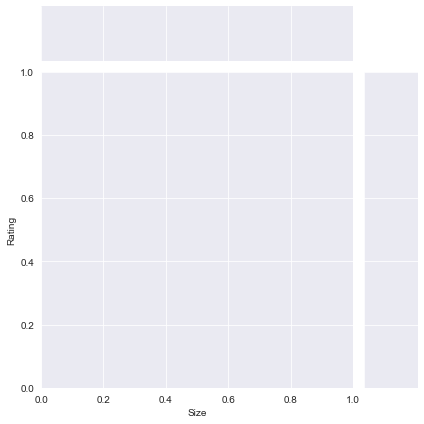

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


# Plot size vs. rating
plt1 = sns.jointplot(x = apps['Size'], y = apps['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# 6. Relation between app category and app price
So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


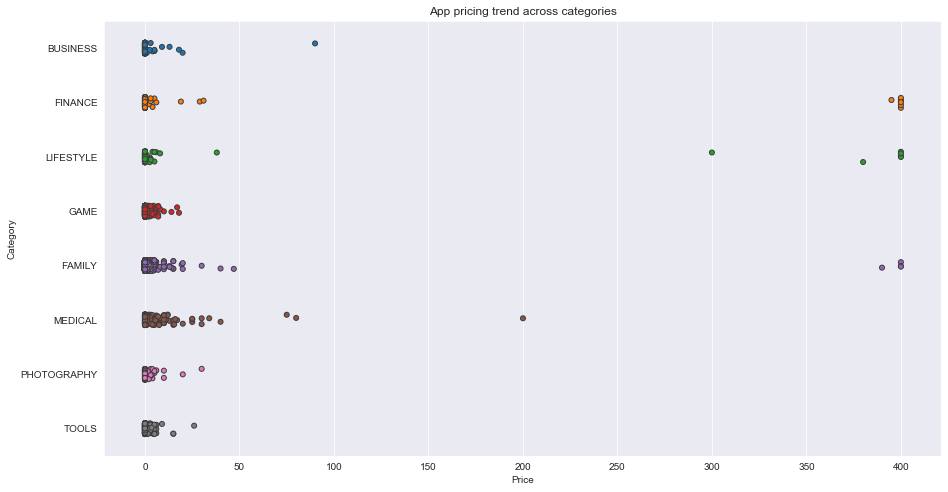

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

# 7. Filter out "junk" apps
It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

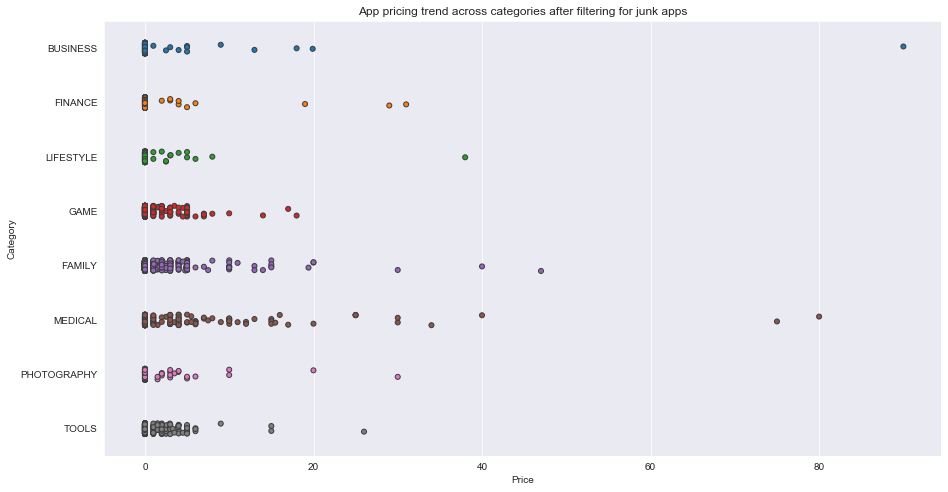

In [24]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] <100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# 8. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [39]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 9. Sentiment analysis of user reviews
Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

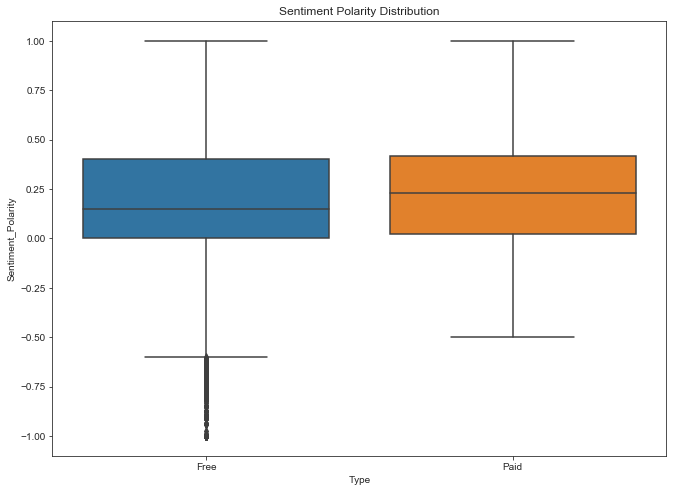

In [34]:
# Load user_reviews.csv
reviews_df = pd.read_csv('C:/Users/ysman/Documents/springboard/Datasets/google-play-store-apps/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [35]:
merged_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
29956,Dino War: Rise of Beasts,GAME,4.1,18996,81,1000000,Free,0.0,Teen,Strategy,1-Aug-18,1.5.2,4.1 and up,"Love game, I can't upload profile picture, tri...",Negative,-0.037500,0.445833
14609,"GCash - Buy Load, Pay Bills, Send Money",FINANCE,4.0,25508,Varies with device,1000000,Free,0.0,Everyone,Finance,31-Jul-18,Varies with device,4.2 and up,DO NOT DOWNLOAD... Do services. No customer he...,Neutral,0.000000,0.000000
30200,Honkai Impact 3rd,GAME,4.7,59017,82,1000000,Free,0.0,Teen,Action,3-Jul-18,2.2.1,4.3 and up,Can't believe phone game looks good... Freneti...,Positive,0.130000,0.500000
22553,H&M,LIFESTYLE,3.7,41941,14,10000000,Free,0.0,Everyone,Lifestyle,30-Jul-18,9.6.3,4.4 and up,All saved favorites gone! Scrolling new interf...,Negative,-0.160653,0.389935
58375,GPS Traffic Speedcam Route Planner by ViaMichelin,MAPS_AND_NAVIGATION,4.3,63920,29,5000000,Free,0.0,Everyone,Maps & Navigation,28-Jul-18,7.16.8,4.0.3 and up,When register new user registry accept afield ...,Positive,0.136364,0.454545
17002,Caviar - Food Delivery,FOOD_AND_DRINK,4.2,3755,8.5,100000,Free,0.0,Everyone,Food & Drink,20-Jul-18,2.4.11,6.0 and up,It good helping peoples make easy live better,Positive,0.442424,0.608333
30818,Crossy Road,GAME,4.5,4230886,60,100000000,Free,0.0,Everyone,Action,1-Aug-18,3.1.0,5.0 and up,It's fun play sometimes hard,Positive,0.004167,0.370833
46681,Airbnb,TRAVEL_AND_LOCAL,4.4,359403,Varies with device,10000000,Free,0.0,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,When post house listing queen size beds select...,Positive,0.350000,0.400000
14955,Expense IQ Money Manager,FINANCE,4.4,21570,27,1000000,Free,0.0,Everyone,Finance,19-Jun-18,2.0.4,4.0 and up,1 star descrip store NOT say features premium....,Positive,0.511111,0.744444
45732,Fantasy Football,SPORTS,3.5,50179,23,1000000,Free,0.0,Everyone,Sports,2-Aug-18,2.5.7.1,5.0 and up,I'm pissed off. I draft scheduled 130 fricking...,Neutral,0.000000,0.000000


          App          Category  Rating  Reviews                Size  \
46636  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46640  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46644  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46645  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46646  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
...       ...               ...     ...      ...                 ...   
46745  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46746  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46747  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46748  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   
46754  Airbnb  TRAVEL_AND_LOCAL     4.4   359403  Varies with device   

       Installs  Type  Price Content Rating          Genres Last Updated  \
46636  10000000  Free    0.0       Everyone  Travel & Local